# PHASE 1: PROJECT SETUP
### blah blah blah

In [54]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

from matplotlib.colors import ListedColormap

train = pd.read_csv("/Users/tomragus/Library/CloudStorage/OneDrive-UCSanDiego/CMI-PIU-Model/data/train.csv")
actigraphy = pd.read_csv("/Users/tomragus/Library/CloudStorage/OneDrive-UCSanDiego/CMI-PIU-Model/data/stats.csv")
test = pd.read_csv("/Users/tomragus/Library/CloudStorage/OneDrive-UCSanDiego/CMI-PIU-Model/data/test.csv")
data_dict = pd.read_csv("/Users/tomragus/Library/CloudStorage/OneDrive-UCSanDiego/CMI-PIU-Model/data/data_dictionary.csv")
sample_sub = pd.read_csv("/Users/tomragus/Library/CloudStorage/OneDrive-UCSanDiego/CMI-PIU-Model/data/sample_submission.csv")

sns.set_theme(style="whitegrid")
%matplotlib inline


display(train.head())
print(f"Train shape: {train.shape}")

display(actigraphy.head())
print(f"Actigraphy shape: {actigraphy.shape}")

display(test.head())
print(f"Test shape: {test.shape}")

display(data_dict.head())




,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Train shape: (3960, 82)


,id,non_wear_percentage,unique_days,enmo_mean,enmo_std,enmo_min,enmo_25%,enmo_50%,enmo_75%,enmo_max,...,light_75%,light_max,battery_voltage_mean,battery_voltage_std,battery_voltage_min,battery_voltage_25%,battery_voltage_50%,battery_voltage_75%,battery_voltage_max,n_records
0,0745c390,0.000000,37,0.045252,0.132576,0.0,0.007953,0.019257,0.036048,5.314874,...,24.750000,2626.199951,4027.514893,108.451317,3829.000000,3958.000000,4029.0,4146.0,4187.0,50458.0
1,eaab7a96,4.650835,21,0.030345,0.099080,0.0,0.000405,0.006128,0.021883,3.966906,...,26.543808,2628.199951,3825.719727,166.158646,3098.166748,3724.000000,3813.0,3947.0,4146.0,323849.0
2,8ec2cc63,0.000000,20,0.056544,0.140594,0.0,0.005643,0.018467,0.048282,5.066334,...,21.022933,2618.199951,4106.425781,50.734318,3853.000000,4089.625000,4111.0,4140.0,4183.0,40003.0
3,b2987a65,0.000000,25,0.053544,0.103401,0.0,0.009947,0.027653,0.057278,6.134459,...,6.200000,2502.000000,3958.604492,122.706802,3468.000000,3841.000000,3947.0,4064.0,6000.0,223915.0
4,7b8842c3,0.000000,35,0.040399,0.090201,0.0,0.005364,0.024135,0.043690,2.774382,...,4.942201,1046.800049,3992.347656,126.121590,3815.083252,3837.333252,4000.0,4087.0,4199.0,15420.0


Actigraphy shape: (996, 32)


,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Test shape: (20, 59)


,Instrument,Field,Description,Type,Values,Value Labels
0,Identifier,id,Participant's ID,str,NaN,NaN
1,Demographics,Basic_Demos-Enroll_Season,Season of enrollment,str,"Spring, Summer, Fall, Winter",NaN
2,Demographics,Basic_Demos-Age,Age of participant,float,NaN,NaN
3,Demographics,Basic_Demos-Sex,Sex of participant,categorical int,"0,1","0=Male, 1=Female"
4,Children's Global Assessment Scale,CGAS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN


# PHASE 2: EXPLORATORY DATA ANALYSIS - FEATURES
### blah blah blah

Shape of dataset: (3960, 82)

Data types:
 id                                         object
Basic_Demos-Enroll_Season                  object
Basic_Demos-Age                             int64
Basic_Demos-Sex                             int64
CGAS-Season                                object
                                           ...   
SDS-SDS_Total_Raw                         float64
SDS-SDS_Total_T                           float64
PreInt_EduHx-Season                        object
PreInt_EduHx-computerinternet_hoursday    float64
sii                                       float64
Length: 82, dtype: object


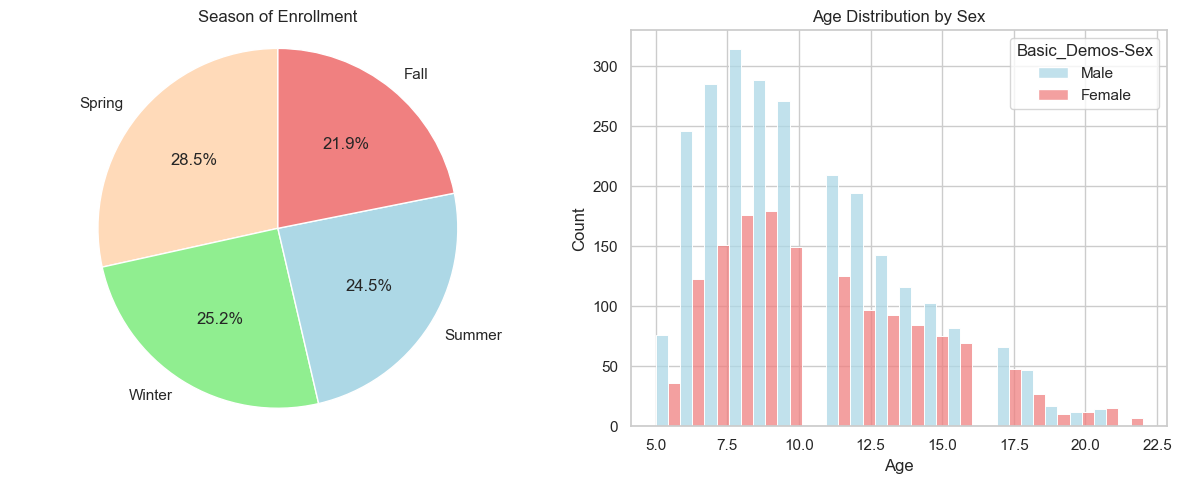

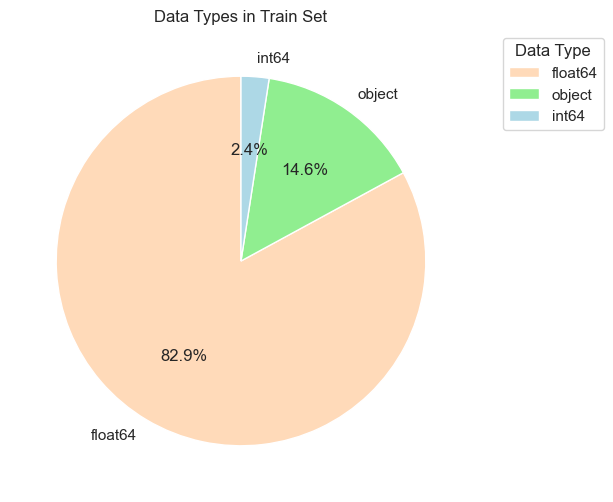

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
count,3960,3960,3960.000000,3960.000000,2555,2421.000000,3310,3022.000000,3027.000000,3076.000000,...,2728.000000,2730.000000,2733.000000,2736.000000,2618,2609.000000,2606.000000,3540,3301.000000,2736.000000
unique,3960,4,NaN,NaN,4,NaN,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4,NaN,NaN,4,NaN,NaN
top,00008ff9,Spring,NaN,NaN,Spring,NaN,Spring,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Spring,NaN,NaN,Spring,NaN,NaN
freq,1,1127,NaN,NaN,697,NaN,929,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,712,NaN,NaN,985,NaN,NaN
mean,NaN,NaN,10.433586,0.372727,NaN,65.454771,NaN,19.331929,55.946713,89.038615,...,1.613636,1.158974,0.943652,27.896199,NaN,41.088923,57.763622,NaN,1.060588,0.580409
std,NaN,NaN,3.574648,0.483591,NaN,22.341862,NaN,5.113934,7.473764,44.569040,...,1.529178,1.343661,1.185460,20.338853,NaN,10.427433,13.196091,NaN,1.094875,0.771122
min,NaN,NaN,5.000000,0.000000,NaN,25.000000,NaN,0.000000,33.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,17.000000,38.000000,NaN,0.000000,0.000000
25%,NaN,NaN,8.000000,0.000000,NaN,59.000000,NaN,15.869350,50.000000,57.200000,...,0.000000,0.000000,0.000000,12.000000,NaN,33.000000,47.000000,NaN,0.000000,0.000000
50%,NaN,NaN,10.000000,0.000000,NaN,65.000000,NaN,17.937682,55.000000,77.000000,...,1.000000,1.000000,1.000000,26.000000,NaN,39.000000,55.000000,NaN,1.000000,0.000000
75%,NaN,NaN,13.000000,1.000000,NaN,75.000000,NaN,21.571244,62.000000,113.800000,...,2.000000,2.000000,1.000000,41.000000,NaN,46.000000,64.000000,NaN,2.000000,1.000000


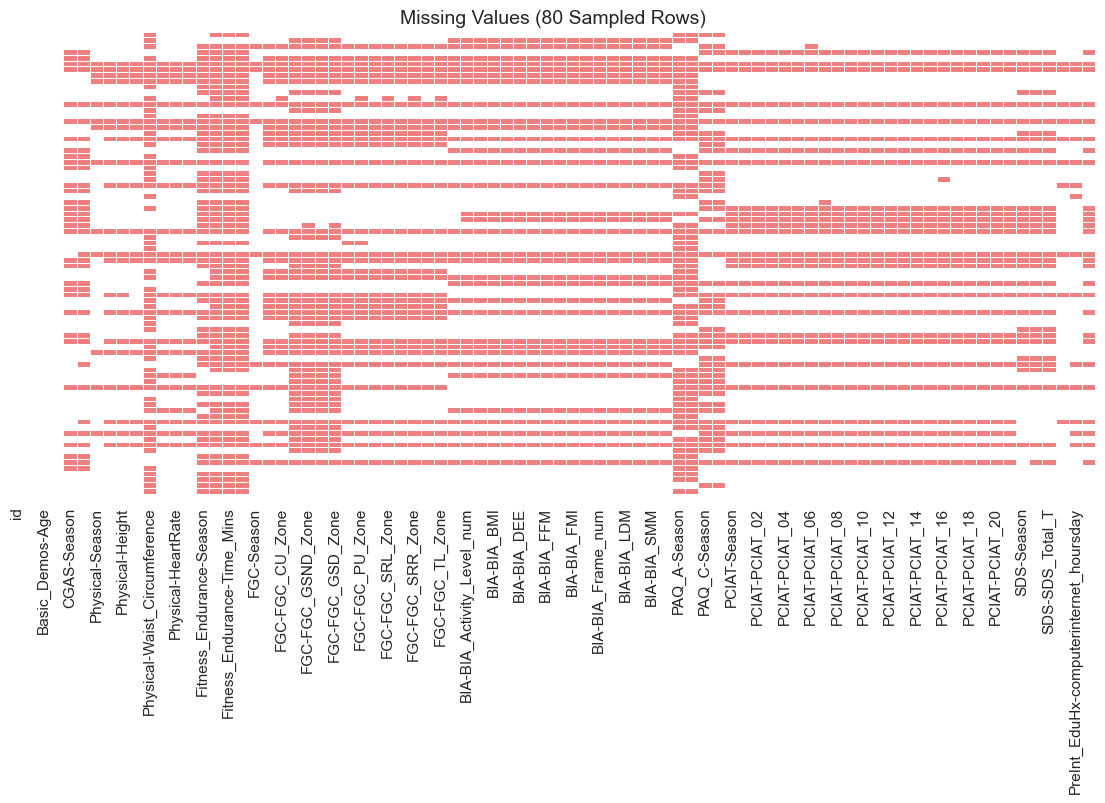

Duplicate rows: 0


id                           3960
Basic_Demos-Enroll_Season       4
CGAS-Season                     4
Physical-Season                 4
Fitness_Endurance-Season        4
FGC-Season                      4
BIA-Season                      4
PAQ_A-Season                    4
PAQ_C-Season                    4
PCIAT-Season                    4
SDS-Season                      4
PreInt_EduHx-Season             4
dtype: int64

In [52]:
print("Shape of dataset:", train.shape)
print("\nData types:\n", train.dtypes)

dtype_df = train.dtypes.reset_index()
dtype_df.columns = ["feature", "dtype"]

dtype_counts = dtype_df["dtype"].value_counts().reset_index()
dtype_counts.columns = ["dtype", "count"]

custom_colors = ['#FFDAB9', '#90EE90', '#ADD8E6', '#F08080', '#FFFACD']

# simple demographics
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# season of Enrollment
season_counts = train['Basic_Demos-Enroll_Season'].value_counts(dropna=False)

axes[0].pie(
    season_counts,
    labels=season_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_colors
)
axes[0].set_title('Season of Enrollment')
axes[0].axis('equal')

# Age Distribution by Sex
sns.histplot(
    data=train.replace({'Basic_Demos-Sex': {0: 'Male', 1: 'Female'}}),
    x='Basic_Demos-Age',
    hue='Basic_Demos-Sex', multiple='dodge',
    palette=[custom_colors[2], custom_colors[3]], bins=20, ax=axes[1]
)
axes[1].set_title('Age Distribution by Sex')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# visualize data types
plt.figure(figsize=(8, 6))
plt.pie(dtype_counts["count"],
        labels=dtype_counts["dtype"],
        colors=custom_colors,
        autopct='%1.1f%%',
        startangle=90,
       )
plt.title("Data Types in Train Set")
plt.legend(title="Data Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# descriptive statistics
display(train.describe(include='all'))

# visualize missing values
sampled = train.sample(80, random_state=42)

# create the red & white heatmap
cmap = ListedColormap(["#ffffff", custom_colors[3]])  # white & red
plt.figure(figsize=(14, 6))
sns.heatmap(sampled.isnull(), 
            cbar=False, 
            cmap=cmap, 
            yticklabels=False, 
            linewidths=0.5, 
            linecolor="white")
plt.title("Missing Values (80 Sampled Rows)", fontsize=14)
plt.show()

# remove duplicate rows
duplicate_count = train.duplicated().sum()
print(f"Duplicate rows: {duplicate_count}")

# boxplots for numeric columns
# for col in train.select_dtypes(include='number').columns:
#     plt.figure()
#     sns.boxplot(x=train[col])
#     plt.title(f'Boxplot of {col}')
#     plt.show()

# for categorical vallues - check the number of unique values
categorical_cols = train.select_dtypes(include=["object", "category"]).columns
train[categorical_cols].nunique().sort_values(ascending=False)


# identify individual features for univariate analysis. NUM & CATEGORICAL

# identify features for bivariate analysis (features vs. target variable [sii]). NUM vs. sii, CATEGORICAL vs. sii

# identify features for multivariate analysis (relationships between multiple features)




# PHASE 2.5: ACTIGRAPHY EDA
### blah blah blah

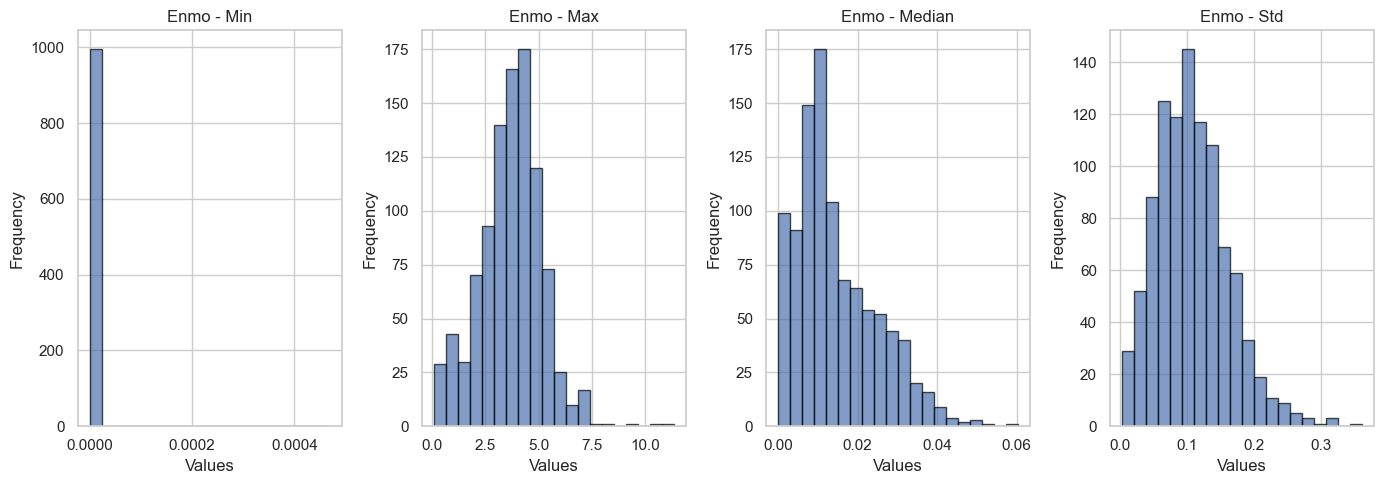

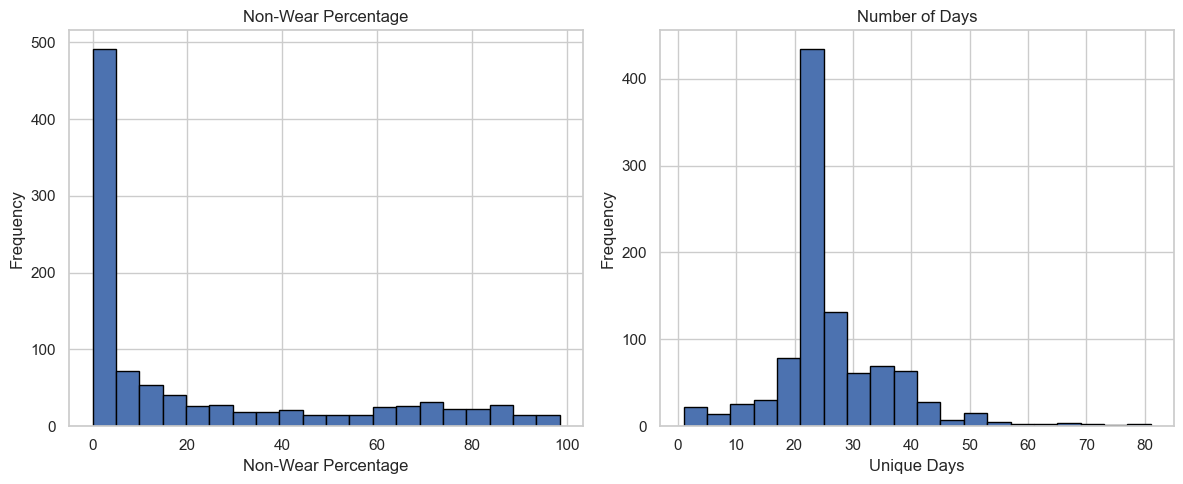

,non_wear_percentage,unique_days
count,996.000000,996.000000
mean,22.199020,25.892570
std,29.751492,9.950506
min,0.000000,1.000000
25%,0.000000,22.000000
50%,5.145835,24.000000
75%,39.636219,29.000000
max,98.515526,81.000000


In [64]:
# ENMO: Min, Max, Median, STD (Standard Deviation)
def plot_parameter_statistics(actigraphy, parameter):
    stats_to_plot = ['min', 'max', '50%', 'std']
    stat_labels = ['Min', 'Max', 'Median', 'Std']

    plt.figure(figsize=(14, 5))

    for j, stat in enumerate(stats_to_plot):
        plt.subplot(1, 4, j + 1)
        
        data = actigraphy[f'{parameter}_{stat}']
        plt.hist(data, bins=20, alpha=0.7, edgecolor='black')
        
        plt.title(f'{parameter.capitalize()} - {stat_labels[j]}')
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_parameter_statistics(actigraphy, 'enmo')


# Non-wear percentage
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(actigraphy['non_wear_percentage'], bins=20, edgecolor='black')
plt.title('Non-Wear Percentage')
plt.xlabel('Non-Wear Percentage')
plt.ylabel('Frequency')

# Number of days
plt.subplot(1, 2, 2)
plt.hist(actigraphy['unique_days'], bins=20, edgecolor='black')
plt.title('Number of Days')
plt.xlabel('Unique Days')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# info on actigraphy data
actigraphy[['non_wear_percentage', 'unique_days']].describe()




# PHASE 4: BUILDING AND TRAINING THE MODEL(S)
### blah blah blah

In [ ]:
# write code here

# PHASE 5: PREPARATION FOR SUBMISSION
### blah blah blah

In [ ]:
# write code here

# PHASE 6: CONSTRUCTING THE PRESENTATION
### blah blah blah

In [ ]:
# write code here